<a href="https://colab.research.google.com/github/biaespinheira/ML-Studies/blob/main/Rede_Neural_Classifica%C3%A7%C3%A3o_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Carregar as bibliotescas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

### Rede Neural Classificação

In [21]:
# Carregar o conjunto de dados Iris
iris = load_iris()

# Converter de array para DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['target'] = iris.target
df

# Definir quem são os atributos de entrada e o atributo alvo
X = df.drop(columns=['target'])
X

y = df['target']
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)# 70% treinamento e 30% teste


In [24]:
y_train[0:5]

,target
81,1
133,2
137,2
75,1
109,2


In [25]:
y_test[0:5]

,target
73,1
18,0
118,2
78,1
76,1


In [ ]:
# Exibir as 05 primeiras linhas do atributo alvo de treinamento


In [ ]:
# Exibir as 05 primeiras linhas dos atributos de entrada de treinamento


In [26]:
# Converter os rótulos para one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [27]:
y_train_cat[0:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [28]:
X_train.shape

(105, 4)

In [38]:
# Criar o modelo de rede neural
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))


# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# y_train - f(xi) -> erro

# Treinar o modelo
model.fit(X_train, y_train_cat, epochs=50, batch_size=10, validation_data=(X_test, y_test_cat), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Exibir o modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

In [46]:
# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test_cat)

print(f"Acurácia: {accuracy:.2f}")
print(f"Erro: {loss:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9495 - loss: 0.1875
Acurácia: 0.96
Erro: 0.18


In [51]:
# Exemplo de novos valores para predição
dados_pred = {
    'sepal length (cm)': [1.0, 3.0],
    'sepal width (cm)': [1.6, 2.4],
    'petal length (cm)': [3.1, 2.3],
    'petal width (cm)': [1.7, 3.2]
}

dados = pd.DataFrame(dados_pred)
y_pred = model.predict(dados)
display(dados)
print(f"Classes previstas: \n{y_pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.0,1.6,3.1,1.7
1,3.0,2.4,2.3,3.2


Classes previstas: 
[[0.06751318 0.3130163  0.6194705 ]
 [0.04201128 0.09672118 0.8612675 ]]


In [ ]:
# uma acurácia boa
# 0.6 -> ruim
# 0.7 -> boa
# 0.8 -> ótima
# 0.9 -> excelente

In [53]:
# Retornando o índice dos valores máximos
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([2, 2])

In [54]:
print(iris.target_names[y_pred_classes[0]])

virginica


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


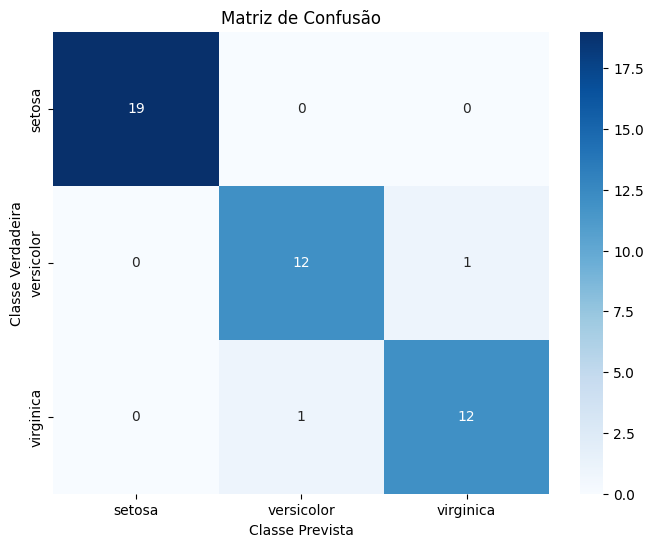

In [55]:
# Matriz de Confusão
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.show()